<a href="https://colab.research.google.com/github/Daniel-F78/SSN/blob/main/T3_Soluci%C3%B3n_Num%C3%A9rica_de_Schr%C3%B6dinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio 1: Hacer un sistema con lo aprendido en clase**

He decidido hacer un sistema de pozo de potencial, encontrado en la página de chem.libretext. El potencial es en forma de V.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Empezamos definiendo el potencial, no se pide un valor específico de pendiente así que definimos uno que nos parezca

In [21]:
def getV(x):
  a=2
  potvalue=a*np.abs(x)
  return potvalue

Ahora definimos la ecuación de Schrödinger

In [22]:
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

Definimos los valores que tratan con la Energía, el valor de tamaño es de 8 unidades y se hacen 100 pasos

In [23]:
L=8
xmin=-L/2
xmax=L/2
h=L/100
x=np.arange(xmin,xmax,h)
n=len(x)
print(h)
print("n =",n)

0.08
n = 100


Ahora podemos calcular la matriz de energía y diagonizarla, de donde podemos obtener los valores propios (vaps) y vectores propios (veps), además de que los ordenaremos

In [24]:
M=Eq(n,h,x)
vaps,veps=np.linalg.eig(M)
idx=vaps.argsort()[::-1]
w=vaps[idx]
vs=veps[:,idx]

Ahora podemos obtener los valores de los niveles energéticos

In [25]:
E=-w/(2.0*h**2)
for k in range(0,6):
  print("n =",k,", E(numeric)=%.4f" %E[k])

n = 0 , E(numeric)=1.2812
n = 1 , E(numeric)=2.9440
n = 2 , E(numeric)=4.0885
n = 3 , E(numeric)=5.1479
n = 4 , E(numeric)=6.0855
n = 5 , E(numeric)=7.0366


Configuramos la foma en la que graficamos

In [26]:
psi = [None]*n
for d in range(0,len(w)):
  psi[d] = vs[:,d]
  int=h*np.dot(psi[d],psi[d])
  psi[d]=psi[d]/int**0.5

Hacemos las gráficas

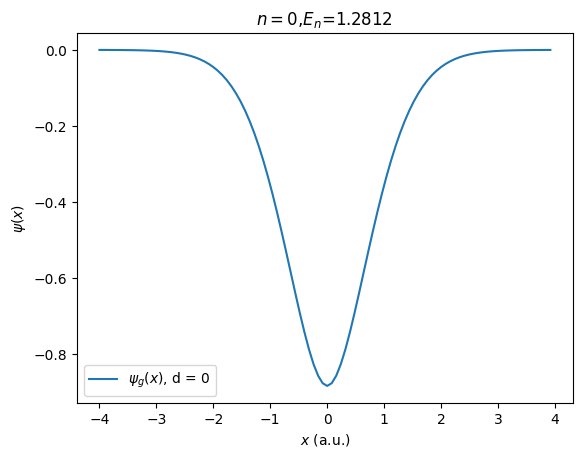

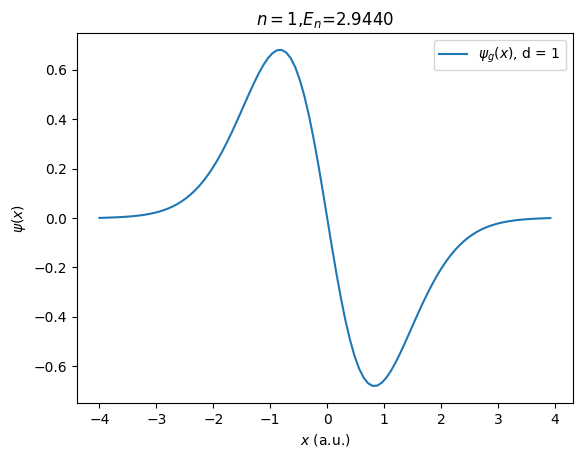

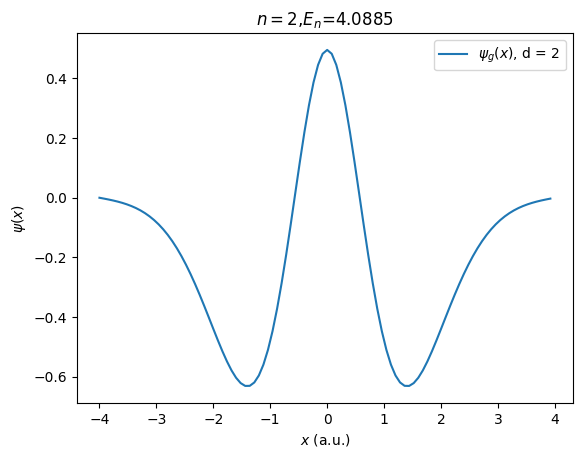

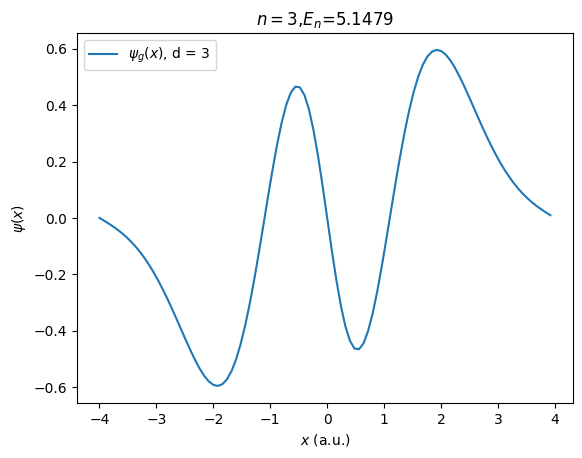

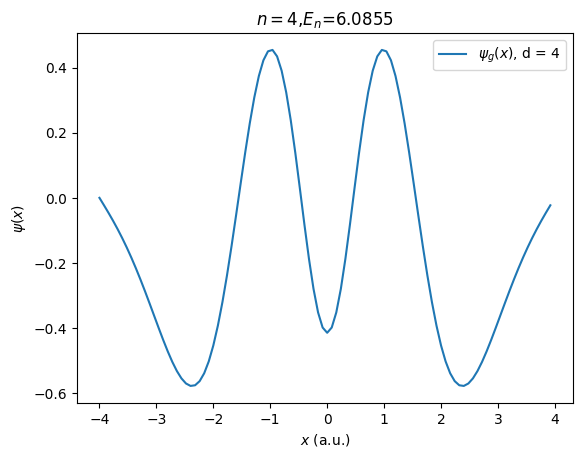

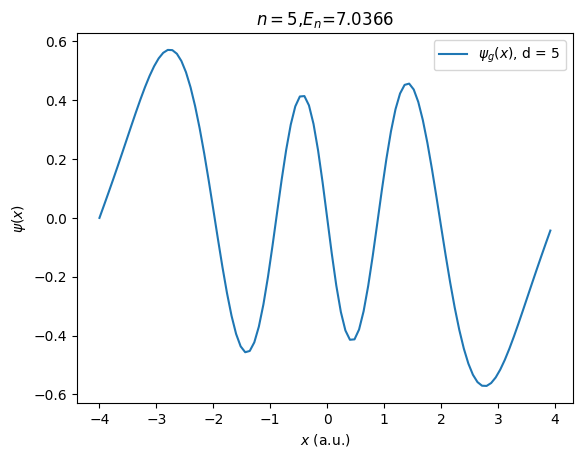

In [27]:
for g in range(0,6):
  plt.plot(x,psi[g],label=r'$\psi_g(x)$, d = ' + str(g))
  plt.title(r'$n=$'+str(g)+r',$E_n$='+'{:.4f}'.format(E[g]))
  plt.legend()
  plt.xlabel(r'$x$ (a.u.)')
  plt.ylabel(r'$\psi(x)$')
  plt.show()

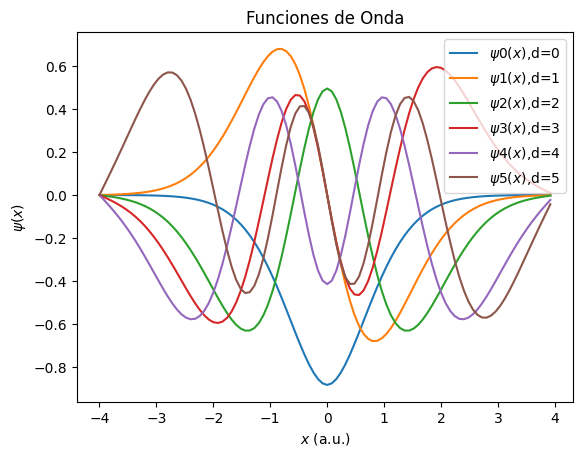

In [28]:
plt.plot(x,psi[0],label=r"$\psi0(x)$,d="+ str(0))
plt.plot(x,psi[1],label=r"$\psi1(x)$,d="+str(1))
plt.plot(x,psi[2],label=r"$\psi2(x)$,d="+str(2))
plt.plot(x,psi[3],label=r"$\psi3(x)$,d="+str(3))
plt.plot(x,psi[4],label=r"$\psi4(x)$,d="+str(4))
plt.plot(x,psi[5],label=r"$\psi5(x)$,d="+str(5))
plt.title("Funciones de Onda")
plt.xlabel(r'$x$ (a.u.)')
plt.ylabel(r'$\psi(x)$')
plt.legend()
plt.show()